# GPViz Introduction

In [1]:
%load_ext lab_black

In [2]:
import gpjax
import gpjax.core as gpx
import gpviz as gpv
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

key = jr.PRNGKey(123)

## GPViz stylesheet

[Matplotlib stylesheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) are a great way to define plotting defaults and GPViz comes shipped with its own stylesheet [here](https://github.com/thomaspinder/GPViz/blob/master/gpviz/styles/gpviz.mplstyle). To load the stylesheet into your workspace, simply run the below line.

In [3]:
plt.style.use("gpviz")

## Plotting priors

We can plot the Gaussian process (GP) prior simply passing a Jax key, GP prior, parameter set and training data. Using these quantities, a series of draws are made from the GP prior's distribution and plotted using GPViz's `plot` function.

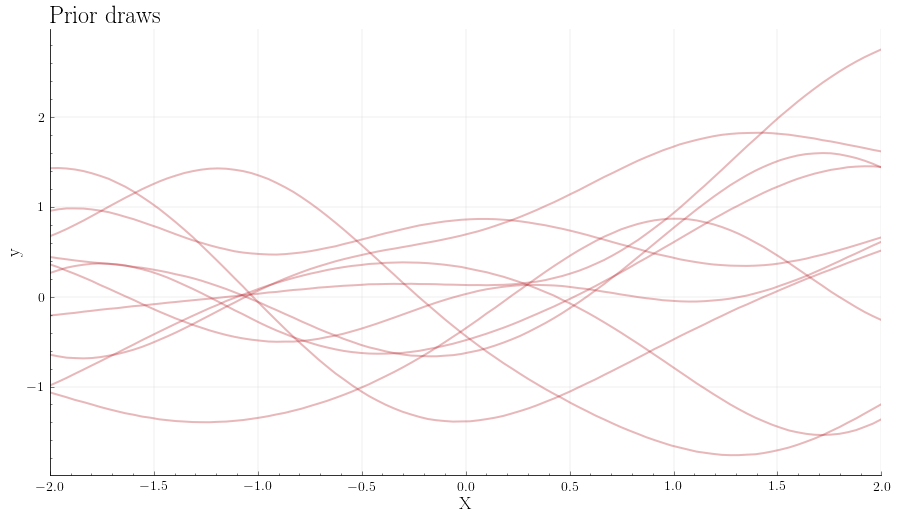

In [10]:
# Simulate data
x = jnp.linspace(-2.0, 2.0, 100).reshape(-1, 1)
y = jnp.sin(x) + jr.normal(key, shape=x.shape) * 0.1
D = gpx.Dataset(X=x, y=y)

# Define GP prior
f = gpx.Prior(kernel=gpx.RBF())
params = gpx.initialise(f)

# Plot
fig, ax = gpv.plot(key, f, params, D, n_samples=10, title="Prior draws")
# plt.savefig("../../media/prior.jpg")

Just like GPJax, GPViz uses [multiple dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch) to enable consistent code structure across the package. As such, the same above plot can be produced by passing in a Jax array in place of GPJax's Dataset object i.e.,
```python
fig, ax = gpv.plot(key, f, params, x, n_samples=10, title="Prior draws")
```

## Posterior plots

We can also plot the GP's predictive posterior distribution. The below code is a barebones implementation for how a GP posterior can be evaluates, and we point the interested reader to [GPJax's documentation](https://gpjax.readthedocs.io/en/latest/) for a full treatment of this topic. However, equipped with a GPJax posterior object, the only additional quantity required to plot the predictive posterior is a testing dataset at which we will evaluate the distribution's values.

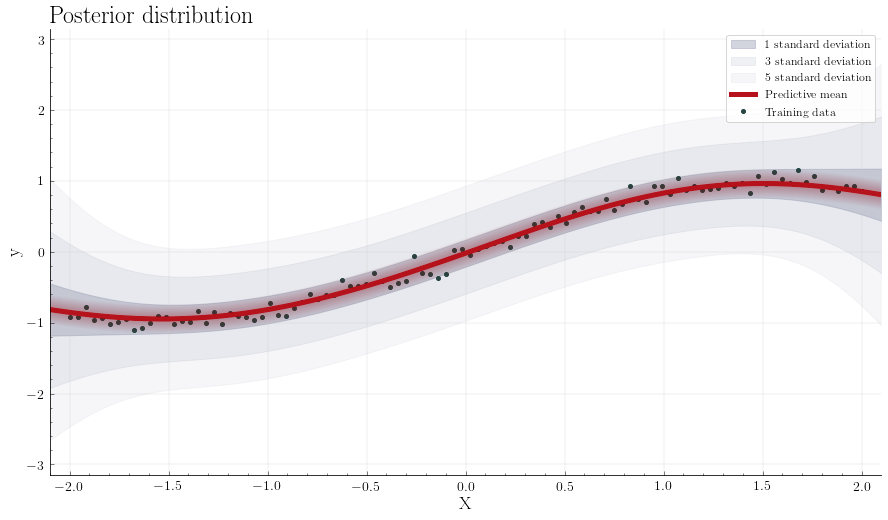

In [11]:
# Compute posterior
fx = f * gpx.Gaussian()
params = gpx.initialise(fx)

# Define test set
testing = gpx.Dataset(X=jnp.linspace(-2.2, 2.2, 100).reshape(-1, 1))

# Plot
fig, ax = gpv.plot(
    key,
    fx,
    params,
    D,
    jnp.linspace(-2.2, 2.2, 100).reshape(-1, 1),
    std_devs=[1, 3, 5],
    legend=True,
    title="Posterior distribution",
    mean=True,
)
# plt.savefig("../../media/posterior.jpg")

The above plot shows the GP's predictive mean and uncertainty. However, it is sometimes useful to visualise the individual samples from the predictive posterior. This is easily achieved by explicitly specifying the number of desired samples as an argument to the `plot` function.

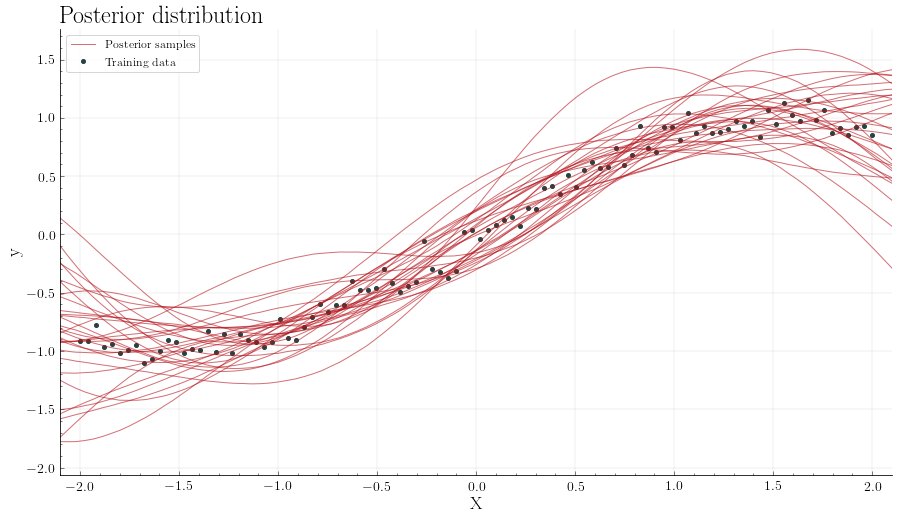

In [12]:
fig, ax = gpv.plot(
    key,
    fx,
    params,
    D,
    jnp.linspace(-2.2, 2.2, 100).reshape(-1, 1),
    n_samples=30,
    std_devs=[],
    legend=True,
    title="Posterior distribution",
    mean=False,
)
# plt.savefig("../../media/posterior2.jpg")

## Kernels

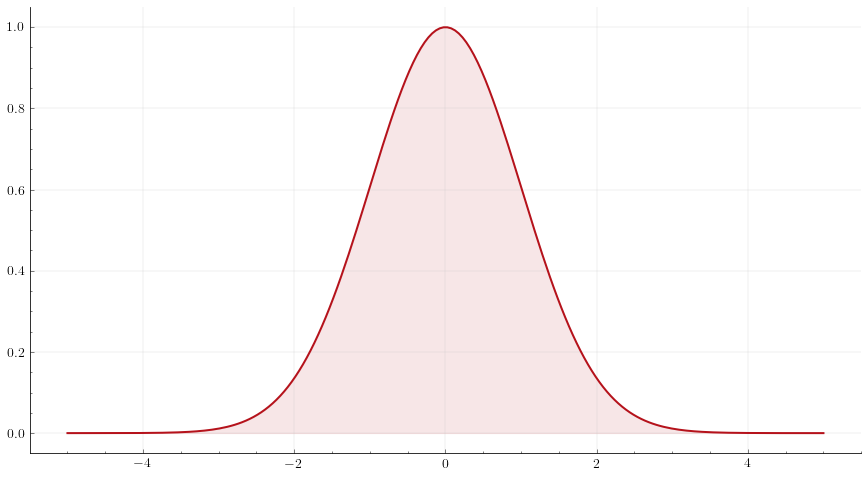

In [13]:
kern = gpx.RBF()
gpv.plot(kern, params=params, xrange=(-5.0, 5.0))
# plt.savefig("../../media/kernel_shape.jpg")

Along with a kernel's shape, we can also plot the resultant Gram matrix that, given a collection of data points, is generated by the kernel.

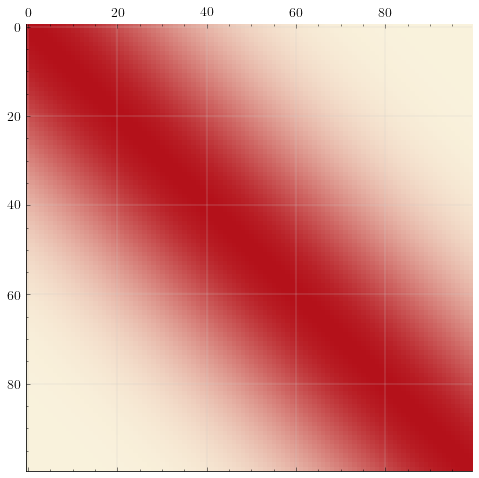

In [14]:
gpv.plot(kern, x, params)
# plt.savefig("../../media/kernel_gram.jpg")

It's worth noting at this point that GPViz will also support the plotting of a kernel's cross-covariance matrix by simply passing in a second array i.e., `gpv.plot(kern, x, x1, params)`.

## System information

In [9]:
%reload_ext watermark
%watermark -n -u -v -iv -w -a 'Thomas Pinder'

Author: Thomas Pinder

Last updated: Mon May 10 2021

Python implementation: CPython
Python version       : 3.8.0
IPython version      : 7.23.1

gpjax     : 0.3.8
jax       : 0.2.10
gpviz     : 0.0.1
matplotlib: 3.4.2

Watermark: 2.2.0

